In [2]:
library(readxl)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [11]:
venek <- data.frame(read_excel("Venek.xlsx")) #nacitam data
vnitrek <- data.frame(read_excel("Vnitrek.xlsx"))
dotaznicek <- data.frame(read_excel("dotaznicek.xlsx"))

dotaznicek <- dotaznicek[,-1]

venek <- venek[,-1] #prvni sloupec mazu
colnames(venek)[1] <- "inicialy" #novy prvni sloupec pojmenovavam jako inicialy

vnitrek <- vnitrek[,-1]
colnames(vnitrek)[1] <- "inicialy"

New names:
* `` -> ...1
* `` -> ...2
New names:
* `` -> ...1
* `` -> ...2
New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3


In [13]:
head(venek)
head(vnitrek)

inicialy,TIB,Sleep.time,onset.latency,efficiency,WASO,X.probuzení
ad,1899-12-31 07:48:45,1899-12-31 07:10:45,4.25,91.795,31.75,16.0
jg,1899-12-31 08:26:00,1899-12-31 07:12:00,15.25,85.510,46.50,20.5
jk,1899-12-31 06:50:30,1899-12-31 05:15:15,3.75,76.880,57.50,32.0
kl,1899-12-31 08:31:00,1899-12-31 06:39:00,24.75,78.250,56.75,33.5
nl,1899-12-31 08:12:30,1899-12-31 06:30:30,9.25,79.355,63.50,26.0
oc,1899-12-31 08:26:15,1899-12-31 05:59:45,15.25,71.190,85.75,39.0


inicialy,TIB,Sleep.time,onset.latency,efficiency,WASO,X.probuzení
ad,1899-12-31 08:03:00,1899-12-31 06:26:45,5.00,80.085,56.75,31.5
jg,1899-12-31 08:15:00,1899-12-31 06:59:15,11.50,84.985,51.50,27.5
jk,1899-12-31 07:46:45,1899-12-31 05:54:45,12.00,76.135,95.50,49.0
kl,1899-12-31 08:04:00,1899-12-31 06:46:00,15.50,83.990,51.25,34.5
nl,1899-12-31 10:12:45,1899-12-31 07:46:15,40.00,76.255,92.25,49.5
oc,1899-12-31 08:15:15,1899-12-31 06:18:45,5.75,76.450,87.00,50.0


In [31]:
t.test(venek$efficiency, vnitrek$efficiency, paired = TRUE, alternative = "two.sided")

t.test(venek$efficiency, vnitrek$efficiency, paired = FALSE, alternative = "two.sided")

wilcox.test(venek$efficiency, vnitrek$efficiency, paired = TRUE, alternative = "two.sided")


	Paired t-test

data:  venek$efficiency and vnitrek$efficiency
t = 0.16688, df = 11, p-value = 0.8705
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.134103  4.812437
sample estimates:
mean of the differences 
              0.3391667 



	Welch Two Sample t-test

data:  venek$efficiency and vnitrek$efficiency
t = 0.13347, df = 19.473, p-value = 0.8952
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.970946  5.649280
sample estimates:
mean of x mean of y 
 80.10750  79.76833 



	Wilcoxon signed rank test

data:  venek$efficiency and vnitrek$efficiency
V = 42, p-value = 0.8501
alternative hypothesis: true location shift is not equal to 0


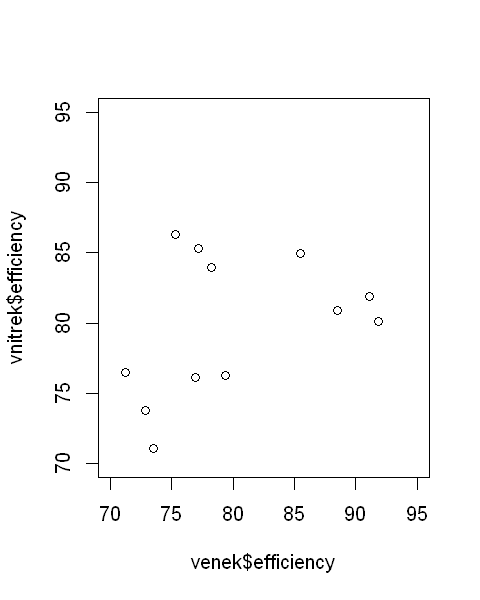

In [40]:
options(repr.plot.width=4, repr.plot.height=5)  
plot(venek$efficiency, vnitrek$efficiency, xlim = c(70,95), ylim = c(70,95))


In [41]:
dotaznicek$helpvar <- c(1:nrow(dotaznicek))
dotaznicek$helpvar2 <- ifelse(dotaznicek$helpvar %% 2 == 0,1,0)
d_vnitrek <- subset(dotaznicek, helpvar2 == 0)
d_venek <- subset(dotaznicek, helpvar2 != 0)

In [44]:
d_vnitrek %>% head()
d_venek %>% head()
head(venek)
head(vnitrek)

,...2,...3,Dnes.jsem.se.vyspal.a.opravdu.skvěle.,Večer.jsem.usnul.a.velmi.rychle.,Během.noci.jsem.se.vůbec.neprobouzel.a.,V.noci.se.mi.zdály.živé.sny.,Pamatuji.si..co.se.mi.v.noci.zdálo.,Dnes.se.mi.vstávalo.opravdu.dobře.,Po.probuzení.jsem.se.cítil.a.odpočatý.á.a.plný.á.energie.,Celkově.jsem.se.tento.den.cítil.a.plný.á.energie.a.neunavný.á.,Přes.den.se.mi.dařilo.soustředit.se.na.mé.aktivity.u.náročné.na.pozornost.,Celkově.jsem.tento.den.měl.a.chuť.podnikat.spoustu.produktivních.aktivit.,Dnes.jsem.se.cítil.v.psychické.pohodě.,Dnes.jsem.mě.l.chuť.vykonávat.fyzickou.aktivitu.,helpvar,helpvar2
1,vevnitř,AD,8,8,8,5,8,6,7,7,8,7,6,7,1,0
3,NA,JG,4,2,6,8,13,5,6,4,4,5,5,4,3,0
5,NA,JK,4,6,8,9,9,5,5,5,6,5,5,5,5,0
7,NA,KL,7,6,10,7,8,7,6,8,6,5,4,4,7,0
9,NA,NL,10,11,9,10,11,12,9,8,10,7,6,9,9,0
11,NA,OC,7,2,4,10,12,6,5,5,4,7,6,7,11,0


,...2,...3,Dnes.jsem.se.vyspal.a.opravdu.skvěle.,Večer.jsem.usnul.a.velmi.rychle.,Během.noci.jsem.se.vůbec.neprobouzel.a.,V.noci.se.mi.zdály.živé.sny.,Pamatuji.si..co.se.mi.v.noci.zdálo.,Dnes.se.mi.vstávalo.opravdu.dobře.,Po.probuzení.jsem.se.cítil.a.odpočatý.á.a.plný.á.energie.,Celkově.jsem.se.tento.den.cítil.a.plný.á.energie.a.neunavný.á.,Přes.den.se.mi.dařilo.soustředit.se.na.mé.aktivity.u.náročné.na.pozornost.,Celkově.jsem.tento.den.měl.a.chuť.podnikat.spoustu.produktivních.aktivit.,Dnes.jsem.se.cítil.v.psychické.pohodě.,Dnes.jsem.mě.l.chuť.vykonávat.fyzickou.aktivitu.,helpvar,helpvar2
2,venku,AD,4,5,11,4,10,3,4,6,6,5,3,5,2,1
4,NA,JG,6,3,10,12,12,8,9,8,8,11,10,8,4,1
6,NA,JK,4,3,6,3,9,5,7,6,7,4,7,3,6,1
8,NA,KL,11,5,13,12,14,4,7,12,9,9,6,7,8,1
10,NA,NL,5,6,7,6,9,3,5,6,7,5,5,9,10,1
12,NA,OC,5,7,7,7,8,7,6,7,7,8,6,6,12,1


inicialy,TIB,Sleep.time,onset.latency,efficiency,WASO,X.probuzení
ad,1899-12-31 07:48:45,1899-12-31 07:10:45,4.25,91.795,31.75,16.0
jg,1899-12-31 08:26:00,1899-12-31 07:12:00,15.25,85.510,46.50,20.5
jk,1899-12-31 06:50:30,1899-12-31 05:15:15,3.75,76.880,57.50,32.0
kl,1899-12-31 08:31:00,1899-12-31 06:39:00,24.75,78.250,56.75,33.5
nl,1899-12-31 08:12:30,1899-12-31 06:30:30,9.25,79.355,63.50,26.0
oc,1899-12-31 08:26:15,1899-12-31 05:59:45,15.25,71.190,85.75,39.0


inicialy,TIB,Sleep.time,onset.latency,efficiency,WASO,X.probuzení
ad,1899-12-31 08:03:00,1899-12-31 06:26:45,5.00,80.085,56.75,31.5
jg,1899-12-31 08:15:00,1899-12-31 06:59:15,11.50,84.985,51.50,27.5
jk,1899-12-31 07:46:45,1899-12-31 05:54:45,12.00,76.135,95.50,49.0
kl,1899-12-31 08:04:00,1899-12-31 06:46:00,15.50,83.990,51.25,34.5
nl,1899-12-31 10:12:45,1899-12-31 07:46:15,40.00,76.255,92.25,49.5
oc,1899-12-31 08:15:15,1899-12-31 06:18:45,5.75,76.450,87.00,50.0


In [50]:
d_vnitrek %>% nrow()
vnitrek %>% nrow()
d_vnitrek$'Dnes.jsem.se.vyspal.opravdu.skvěle.'

[1] 12

[1] 12

NULL


Call:
lm(formula = d_vnitrek[, 3] ~ vnitrek$efficiency)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3700 -1.4313  0.2874  0.7213  4.2254 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)
(Intercept)         -8.1609     9.8955  -0.825    0.429
vnitrek$efficiency   0.1827     0.1238   1.476    0.171

Residual standard error: 2.045 on 10 degrees of freedom
Multiple R-squared:  0.1788,	Adjusted R-squared:  0.09673 
F-statistic: 2.178 on 1 and 10 DF,  p-value: 0.1708



Call:
lm(formula = d_venek[, 3] ~ venek$efficiency)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9648 -1.6869 -0.4436  1.4096  6.2350 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)       23.3196    10.4591    2.23   0.0499 *
venek$efficiency  -0.2016     0.1301   -1.55   0.1521  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.132 on 10 degrees of freedom
Multiple R-squared:  0.1937,	Adjusted R-squared:  0.1131 
F-statistic: 2.403 on 1 and 10 DF,  p-value: 0.1521


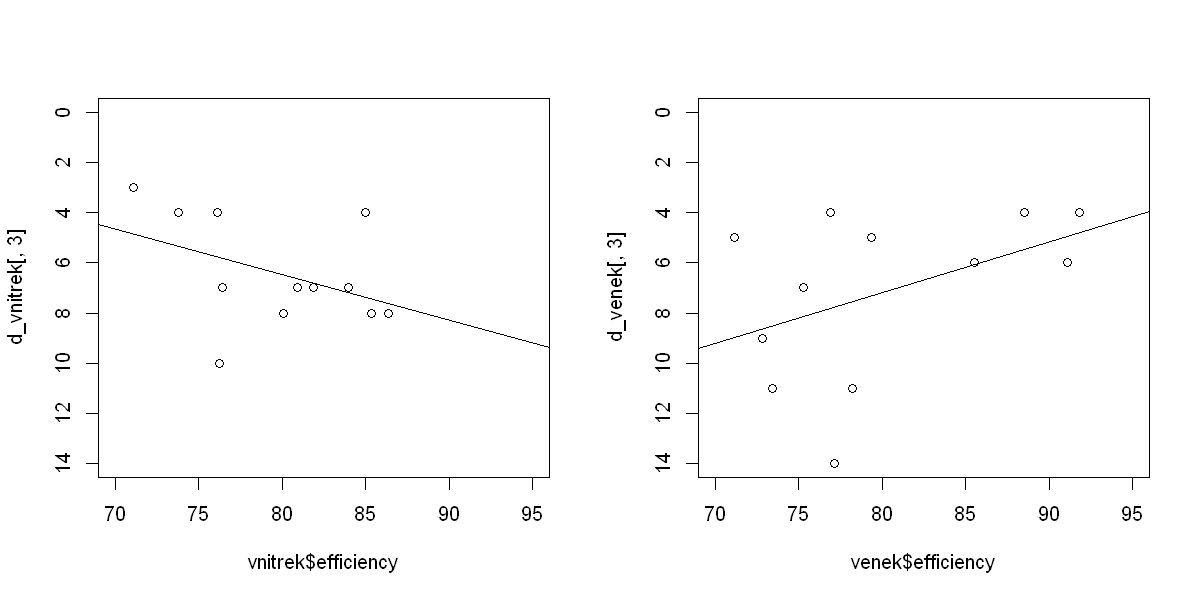

In [68]:
options(repr.plot.width=10, repr.plot.height=5)  
par(mfrow = c(1,2))

plot(vnitrek$efficiency, d_vnitrek[,3], ylim = c(14,0), xlim = c(70,95))
model1 <- lm(d_vnitrek[,3] ~ vnitrek$efficiency)
abline(a=model1$coefficients[1], b=model1$coefficients[2])

plot(venek$efficiency, d_venek[,3], ylim = c(14,0), xlim = c(70,95))
model2 <- lm(d_venek[,3] ~ venek$efficiency)
abline(a=model2$coefficients[1], b=model2$coefficients[2])

summary(model1)
summary(model2)